[View in Colaboratory](https://colab.research.google.com/github/satyajittarai/AI6-Assignments/blob/master/sharkwhale.ipynb)

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install fastai
!pip install torch

    100% |████████████████████████████████| 122kB 3.7MB/s 
    100% |████████████████████████████████| 1.5MB 7.1MB/s 
    100% |████████████████████████████████| 112kB 11.0MB/s 
    100% |████████████████████████████████| 3.6MB 8.2MB/s 
    100% |████████████████████████████████| 51kB 20.6MB/s 
    100% |████████████████████████████████| 2.2MB 976kB/s 
    100% |████████████████████████████████| 61kB 24.5MB/s 
    100% |████████████████████████████████| 496.4MB 38kB/s 
    100% |████████████████████████████████| 184kB 4.8MB/s 
    100% |████████████████████████████████| 112kB 28.6MB/s 
    100% |████████████████████████████████| 901kB 6.9MB/s 
    100% |████████████████████████████████| 71kB 26.5MB/s 
    100% |████████████████████████████████| 11.6MB 815kB/s 
    100% |████████████████████████████████| 92kB 26.8MB/s 
    100% |████████████████████████████████| 15.8MB 742kB/s 
    100% |████████████████████████████████| 1.5MB 6.6MB/s 
    100% |████████████████████████████████| 4.4MB 3

In [0]:
# This file contains all the main external libs we'll use# This  
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
from google.colab import files
uploaded = files.upload()

Saving sharkwhale.zip to sharkwhale.zip


In [8]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "sharkwhale.zip" with length 76013 bytes


In [9]:
!ls
!unzip sharkwhale.zip

sample_data  sharkwhale.zip
Archive:  sharkwhale.zip
   creating: sharkwhale/
   creating: sharkwhale/train/
   creating: sharkwhale/train/shark/
  inflating: sharkwhale/train/shark/2Q== (2).jpg  
  inflating: sharkwhale/train/shark/2Q== (3).jpg  
  inflating: sharkwhale/train/shark/2Q== (4).jpg  
  inflating: sharkwhale/train/shark/2Q== (8).jpg  
  inflating: sharkwhale/train/shark/2Q== (9).jpg  
  inflating: sharkwhale/train/shark/2Q==.jpg  
  inflating: sharkwhale/train/shark/9k= (1).jpg  
  inflating: sharkwhale/train/shark/9k= (2).jpg  
  inflating: sharkwhale/train/shark/9k=.jpg  
  inflating: sharkwhale/train/shark/Z (2).jpg  
   creating: sharkwhale/train/whale/
  inflating: sharkwhale/train/whale/2Q== (1).jpg  
  inflating: sharkwhale/train/whale/9k= (1).jpg  
  inflating: sharkwhale/train/whale/9k= (3).jpg  
  inflating: sharkwhale/train/whale/9k=.jpg  
  inflating: sharkwhale/train/whale/Z (1).jpg  
   creating: sharkwhale/valid/
   creating: sharkwhale/valid/shark/
  inflat

In [0]:
PATH = "sharkwhale/"
sz=224

In [13]:
os.listdir(PATH)

['valid', 'train']

In [14]:
os.listdir(f'{PATH}valid')

['shark', 'whale']

In [15]:
files = os.listdir(f'{PATH}valid/shark')[:5]
files

['2Q== (5).jpg', '2Q== (1).jpg', '9k= (3).jpg', 'Z.jpg', 'Z (1).jpg']

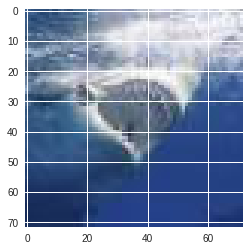

In [16]:
img = plt.imread(f'{PATH}valid/shark/{files[2]}')
plt.imshow(img);

In [17]:
img.shape

(72, 72, 3)

In [18]:
img[:4,:4]

array([[[ 65, 102, 146],
        [ 59,  93, 138],
        [ 50,  84, 129],
        [ 46,  80, 125]],

       [[ 53,  87, 132],
        [ 61,  95, 140],
        [ 66, 100, 145],
        [ 59,  93, 138]],

       [[ 54,  88, 133],
        [ 50,  84, 129],
        [ 47,  82, 124],
        [ 48,  83, 125]],

       [[ 63,  98, 140],
        [ 47,  82, 124],
        [ 33,  68, 110],
        [ 37,  70, 113]]], dtype=uint8)

In [19]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 20)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 77244223.94it/s]


100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


epoch      trn_loss   val_loss   accuracy   
    0      1.007332   0.611272   0.642857  
    1      0.878422   0.568517   0.642857  
    2      0.679709   0.531871   0.642857  
    3      0.560266   0.481618   0.642857  
    4      0.466708   0.444403   0.642857  
    5      0.395622   0.396678   0.785714  
    6      0.343264   0.363035   0.857143  
    7      0.303088   0.330802   0.857143  
    8      0.272065   0.306698   0.857143  
    9      0.248167   0.281783   0.857143  
    10     0.22537    0.257285   0.928571  
    11     0.206264   0.23158    0.928571  
    12     0.190076   0.209703   0.928571  
    13     0.176166   0.195069   0.928571  
    14     0.163345   0.180528   1.0       
    15     0.153053   0.170943   1.0       
    16     0.14832    0.163976   1.0       
    17     0.138765   0.157191   1.0       
    18     0.130631   0.152096   1.0       
    19     0.12357    0.147166   1.0       



[array([0.14717]), 1.0]

In [20]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [21]:
# from here we know that 'shark' is label 0 and 'whale' is label 1.
data.classes

['shark', 'whale']

In [22]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(14, 2)

In [23]:
log_preds[:10]

array([[-0.27378, -1.42921],
       [-0.00829, -4.79667],
       [-0.06541, -2.75959],
       [-0.07097, -2.68083],
       [-0.41429, -1.08119],
       [-0.00086, -7.05723],
       [-0.42075, -1.06873],
       [-7.53049, -0.00054],
       [-0.95373, -0.48662],
       [-3.95027, -0.01944]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(whale)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


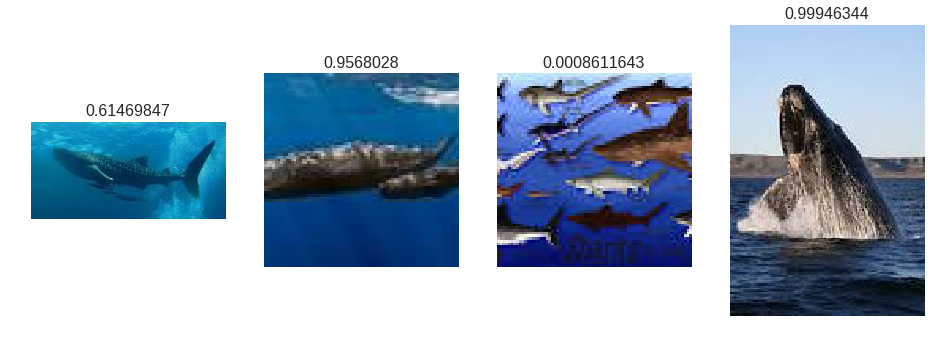

In [28]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [29]:
# 2. A few incorrect labels at random
#rand_by_correct(False)
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

ValueError: ignored

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct shark


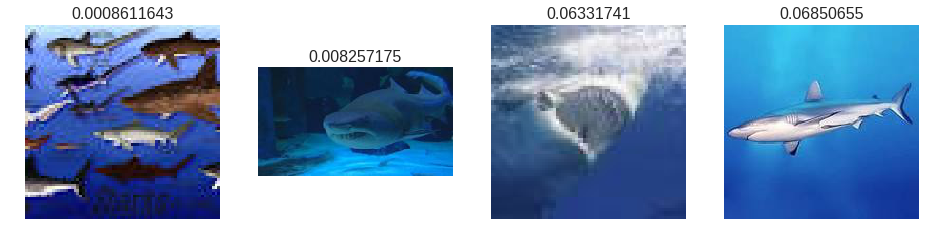

In [31]:
plot_val_with_title(most_by_correct(0, True), "Most correct shark")

Most correct whale


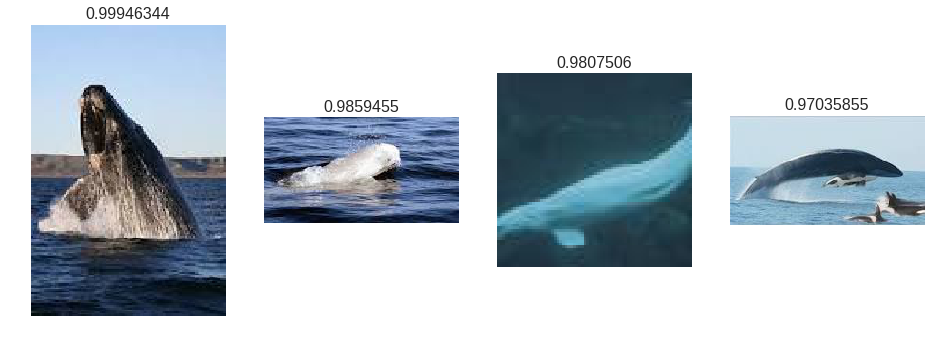

In [33]:
plot_val_with_title(most_by_correct(1, True), "Most correct whale")

In [34]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect shark")

Most incorrect shark
Not Found.


In [35]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect whale")

Most incorrect whale
Not Found.


Most uncertain predictions


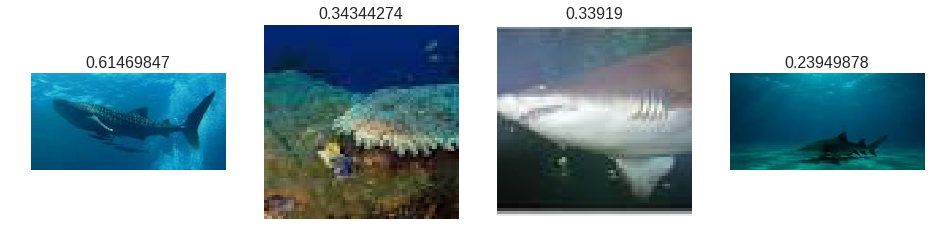

In [36]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")